In [1]:
"""
GENERAL OPTIONS:

    regime: SOLO (MSFT)
    kinds:  YIELD ITSELF
    
"""
pass

In [2]:
import json
import time
import numpy
import pandas
from data.flat import load

E:\venv\financial_news_re\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [3]:
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, Normalizer
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.svm import LinearSVR, SVR, NuSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

In [3]:
k = 'C:/Users/MainUser/Desktop/AlphaVantage.txt'
# k = 'C:/Users/MainUser/Desktop/OpenAPI_sandbox.txt'
crs = open(k, "r")
for columns in ( raw.strip().split() for raw in crs ):
    api_key = columns[0]

In [4]:
target_quotes = ['MSFT']
news_horizon = 10
effect_horizon = 1
max_quotes_lag = 10

In [5]:
from data.flat import load_old

doa = load_old(api_key, target_quotes, news_horizon, effect_horizon, max_quotes_lag, show_shapes=True)
doa

(40,)
(39,)
(39,)
(29,)
(9625,)
(24,)


,index,open_hori1_LAG0,high_hori1_LAG0,low_hori1_LAG0,close_hori1_LAG0,volume_hori1_LAG0,open_hori1_LAG1,high_hori1_LAG1,low_hori1_LAG1,close_hori1_LAG1,...,high_hori1_LAG10,low_hori1_LAG10,close_hori1_LAG10,volume_hori1_LAG10,ticker,id,time,title,lag,target_date
0,2019-09-04,-0.00502549,-0.00355872,-0.00571512,-0.0115527,0.0480404,0.0185931,0.0144315,0.00420044,0.0133784,...,-0.00115349,-0.00258671,0.00837826,0.150151,MSFT,141465,2019-08-29 22:36:30.057,"Shares rally, bond yields rise as China fuels ...",6,2019-09-04
1,2019-09-04,-0.00502549,-0.00355872,-0.00571512,-0.0115527,0.0480404,0.0185931,0.0144315,0.00420044,0.0133784,...,-0.00115349,-0.00258671,0.00837826,0.150151,MSFT,141466,2019-08-29 22:36:30.057,"Argentine bond prices fall, country risk soars...",6,2019-09-04
2,2019-09-04,-0.00502549,-0.00355872,-0.00571512,-0.0115527,0.0480404,0.0185931,0.0144315,0.00420044,0.0133784,...,-0.00115349,-0.00258671,0.00837826,0.150151,MSFT,141467,2019-08-29 22:36:30.057,Huawei under probe by U.S. prosecutors over ne...,6,2019-09-04
3,2019-09-04,-0.00502549,-0.00355872,-0.00571512,-0.0115527,0.0480404,0.0185931,0.0144315,0.00420044,0.0133784,...,-0.00115349,-0.00258671,0.00837826,0.150151,MSFT,141468,2019-08-29 22:36:30.057,"As U.S. Treasuries sizzle, some bond investors...",6,2019-09-04
4,2019-09-04,-0.00502549,-0.00355872,-0.00571512,-0.0115527,0.0480404,0.0185931,0.0144315,0.00420044,0.0133784,...,-0.00115349,-0.00258671,0.00837826,0.150151,MSFT,141469,2019-08-29 22:36:30.057,"China trade comments lift Wall Street as tech,...",6,2019-09-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51182,2019-10-14,0.00307824,0.00527479,-0.000143349,0.000931566,0.879911,-0.0116329,-0.00964405,-0.00896057,-0.00415235,...,0.00822469,-0.00823777,-0.0093505,0.220753,MSFT,406845,2019-10-05 06:04:32.200,U.S. unemployment rate hits 3.5%; job growth m...,9,2019-10-14
51183,2019-10-14,0.00307824,0.00527479,-0.000143349,0.000931566,0.879911,-0.0116329,-0.00964405,-0.00896057,-0.00415235,...,0.00822469,-0.00823777,-0.0093505,0.220753,MSFT,406846,2019-10-05 06:04:32.200,Instant View: U.S. September payrolls lower th...,9,2019-10-14
51184,2019-10-14,0.00307824,0.00527479,-0.000143349,0.000931566,0.879911,-0.0116329,-0.00964405,-0.00896057,-0.00415235,...,0.00822469,-0.00823777,-0.0093505,0.220753,MSFT,406895,2019-10-05 06:12:19.239,Hong Kong metro stays shut after night of viol...,9,2019-10-14
51185,2019-10-14,0.00307824,0.00527479,-0.000143349,0.000931566,0.879911,-0.0116329,-0.00964405,-0.00896057,-0.00415235,...,0.00822469,-0.00823777,-0.0093505,0.220753,MSFT,406995,2019-10-05 06:28:54.713,UPDATE 3-PayPal becomes first member to exit F...,9,2019-10-14


In [5]:
data = await load(api_key, target_quotes, news_horizon, effect_horizon, max_quotes_lag, show_shapes=True)
data

AttributeError: 'datetime.date' object has no attribute 'tzinfo'

In [7]:
"""
model group A-00

targets: prc increase D2D for {open price; close price; max price; min price; volume}
fields: any transform of the target
"""
pass

In [8]:
"""
model A-00-1: open price
"""
pass

In [9]:
# step 1: prepare data

In [10]:
# clarify names

data = data.rename(columns={'lag': 'news_horizon'})

In [11]:
# set model specification

tsi_names = ['target_date']
y_names = ['open_hori1_LAG0']
x_names = [x for x in data.columns.values if 'open' in x and x not in y_names] + ['news_horizon']

In [12]:
# transformations
# all of them are in the .json file

with open('./transformers.json') as f:
    transformers = json.load(f)

transformers

{'StandardScaler': {},
 'MinMaxScaler': {'feature_range': [[0, 1], [-1, 1]]},
 'MaxAbsScaler': {},
 'Normalizer': {'norm': ['l1', 'l2', 'max']}}

In [13]:
# sampling function

def ts_sampler(T, X, Y, n_folds, test_rate, kind):
    if kind == 'nofolds':
        thresh = int((1 - test_rate) * X.shape[0])
        T_train, X_train, Y_train, T_test, X_test, Y_test = T[:thresh, :], X[:thresh, :], Y[:thresh, :], T[thresh:, :], X[thresh:, :], Y[thresh:, :]
    if kind == 'folded':
        thresh = int((1 - test_rate) * X.shape[0])
        T_train, X_train, Y_train, T_test, X_test, Y_test = T[:thresh, :], X[:thresh, :], Y[:thresh, :], T[thresh:, :], X[thresh:, :], Y[thresh:, :]
        fold_length = thresh / n_folds
        fold_bounds = [(int(j * fold_length), int((j + 1) * fold_length)) for j in range(n_folds)]
        T_train = [T_train[fold_bounds[j][0]:T_train[fold_bounds[j][1]], :] for j in range(n_folds)]
        X_train = [X_train[fold_bounds[j][0]:X_train[fold_bounds[j][1]], :] for j in range(n_folds)]
        Y_train = [Y_train[fold_bounds[j][0]:Y_train[fold_bounds[j][1]], :] for j in range(n_folds)]
    return T_train, X_train, Y_train, T_test, X_test, Y_test
    

In [14]:
"""
# sample (with folds)

kind = 'folded'
n_folds, test_rate = 3, 0.2
T_, X_, Y_ = numpy.array(tsi_names), numpy.array(x_names), numpy.array(y_names)
T, X, Y = data[T_].values, data[X_].values, data[Y_].values
T_train, X_train, Y_train, T_test, X_test, Y_test = ts_sampler(T, X, Y, n_folds, test_rate, kind)
"""
pass

In [15]:
# sample (without folds)

kind = 'nofolds'
test_rate = 0.2
T_, X_, Y_ = numpy.array(tsi_names), numpy.array(x_names), numpy.array(y_names)
T, X, Y = data[T_].values, data[X_].values, data[Y_].values
T_train, X_train, Y_train, T_test, X_test, Y_test = ts_sampler(T, X, Y, None, test_rate, kind)

In [19]:
Y_train.shape

(8650, 1)

In [29]:
pandas.Series(Y_train.ravel()).value_counts()

-0.013913    2235
-0.013654    2113
 0.020800    1936
-0.008051    1047
-0.005066     619
 0.012785     549
 0.014356     151
dtype: int64

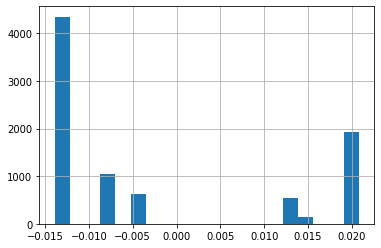

In [28]:
pandas.Series(Y_train.ravel()).hist(bins=20)

In [34]:
"""
naive analysis
"""

model = LinearRegression()
model.fit(X_train, Y_train)
Y_hat_train = model.predict(X_train)
Y_hat_test = model.predict(X_test)
print(r2_adj(Y_train, Y_hat_train, X_train.shape[0], X_train.shape[1]))
print(r2_score(Y_train, Y_hat_train))
print(r2_adj(Y_train, Y_hat_train, X_train.shape[0], X_train.shape[1]))
print(r2_score(Y_train, Y_hat_train))

0.14333284006655855
0.14372903253270886
0.14333284006655855
0.14372903253270886


In [16]:
"""
model realisation party A-00-1-SK: sklearn-interfaced models
"""
pass

In [17]:
# models
# all of them are stored in .json file with possible parameters

import json

with open('./models_params.json') as f:
    models_params = json.load(f)

models_params

{'LinearRegression': {'n_jobs': [-1]},
 'ElasticNet': {'alpha': [0.01, 0.1, 0.25, 0.5, 0.75, 0.95, 0.99],
  'l1_ratio': [0, 0.01, 0.1, 0.25, 0.5, 0.75, 0.95, 0.99],
  'max_iter': [100000]},
 'KNeighborsRegressor': {'n_neighbors': [2, 3, 5, 8, 10],
  'weights': ['uniform', 'distance'],
  'p': [1, 2],
  'n_jobs': [-1]},
 'LinearSVR': {'epsilon': [0.0, 0.1, 0.5, 1.0],
  'C': [0.1, 1.0, 10.0, 100.0],
  'max_iter': [100000]},
 'SVR': {'kernel': ['poly', 'rbf', 'sigmoid'],
  'gamma': ['auto', 'scale'],
  'C': [0.1, 1.0, 10.0, 100.0],
  'epsilon': [0.0, 0.1, 0.5, 1.0],
  'shrinking': [True, False],
  'max_iter': [100000]},
 'NuSVR': {'nu': [0.1, 0.25, 0.5, 0.75, 1.0],
  'C': [0.1, 1.0, 10.0, 100.0],
  'kernel': ['poly', 'rbf', 'sigmoid'],
  'gamma': ['auto', 'scale'],
  'shrinking': [True, False],
  'max_iter': [100000]},
 'DecisionTreeRegressor': {'splitter': ['best', 'random'],
  'max_depth': [None, 10, 5, 2],
  'max_features': ['auto', 'sqrt', 'log2']},
 'ExtraTreesRegressor': {'n_estimato

In [18]:
def multiply_params(params):
    keys = numpy.array(list(params.keys()))
    dims = numpy.array([len(params[keys[j]]) for j in numpy.arange(keys.shape[0])])
    result = []
    for j in numpy.arange(dims.prod()):
        curr = j
        res = {}
        for k in numpy.arange(keys.shape[0]):
            ix = curr % dims[k]
            res[keys[k]] = params[keys[k]][ix]
            curr = curr // dims[k]
        result.append(res)
    return result


In [19]:
def r2_adj(y_true, y_pred, dim0, dim1):
    r2 = r2_score(y_true, y_pred)
    result = 1 - (1 - r2) * (dim0 - 1) / (dim0 - dim1 -1)
    return result

In [20]:
X_train.shape, X_test.shape

((8650, 4), (2163, 4))

In [21]:
dim_transform = 0
for transformer_name, transformer_params in transformers.items():
    multiple_transformer_params = multiply_params(transformer_params)
    dim_transform += len(multiple_transformer_params)
dim_transform

7

In [22]:
dim_models = 0
for model_name, model_args in models_params.items():
    multiple_model_args = multiply_params(model_args)
    dim_models += len(multiple_model_args)
dim_models

16569

In [27]:
print('Total N of experiments: {}'.format(dim_transform * dim_models))

Total N of experiments: 115983


In [30]:
# well, let's loop over that all (NO GOD PLEASE NOOOOOO)
# (kind: nofolds)

scorer = r2_adj
report = pandas.DataFrame(columns=['XP', 'trans', 'trans_p', 'model', 'model_p', 'sc_train', 'sc_test', 'time'])
verbose_step = 1000

#_ = 1
xp = 1
total_time = time.time()
for transformer_name, transformer_params in transformers.items():
    multiple_transformer_params = multiply_params(transformer_params)
    for transformer_param in multiple_transformer_params:
        x_transformer, y_transformer = locals()[transformer_name](**transformer_param), locals()[transformer_name](**transformer_param)
        x_transformer.fit(X_train)
        y_transformer.fit(Y_train)
        for model_name, model_args in models_params.items():
            multiple_model_args = multiply_params(model_args)
            for model_arg in multiple_model_args:
                model_time = time.time()
                model = locals()[model_name](**model_arg)
                X_train_transformed = x_transformer.transform(X_train)
                X_test_transformed = x_transformer.transform(X_test)
                Y_train_transformed = y_transformer.transform(Y_train)
                model.fit(X_train_transformed, Y_train_transformed.ravel())
                Y_hat_train_transformed = model.predict(X_train_transformed)
                Y_hat_test_transformed = model.predict(X_test_transformed)
                Y_hat_train = y_transformer.inverse_transform(Y_hat_train_transformed.reshape(-1, 1))
                Y_hat_test = y_transformer.inverse_transform(Y_hat_test_transformed.reshape(-1, 1))
                score_train = scorer(Y_train, Y_hat_train, X_train.shape[0], X_train.shape[1])
                score_test = scorer(Y_test, Y_hat_test, X_test.shape[0], X_test.shape[1])
                model_time = time.time() - model_time
                result = {'XP': xp, 'trans': transformer_name, 'trans_p': str(transformer_param), 'model': model_name, 'model_p': str(model_arg), 'sc_train': score_train, 'sc_test': score_test, 'time': model_time}
                report = report.append(result, ignore_index=True)
                #if _ == 1:
                #    print(model_name)
                if xp % verbose_step == 0:
                    print(xp)
                xp += 1
        _ += 1
total_time = time.time() - total_time
print('N experiments: {0:10}; Spent time: {1:.0f}h {2:.0f}m {3:.0f}s'.format(xp, (total_time // 3600), ((total_time // 60) % 60), ((total_time % 3600) % 60)))

E:\venv\financial_news_re\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3712.152749228012, tolerance: 0.8649999999999919
  model = cd_fast.enet_coordinate_descent(
E:\venv\financial_news_re\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3775.4058218036485, tolerance: 0.8649999999999919
  model = cd_fast.enet_coordinate_descent(
E:\venv\financial_news_re\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3846.3273516735726, tolerance: 0.8649999999999919
  model = cd_fast.enet_coordinate_descent(
E:\venv\financial_news_re\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:474: Converge

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000


E:\venv\financial_news_re\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 651.7116248617416, tolerance: 0.1504192473961074
  model = cd_fast.enet_coordinate_descent(
E:\venv\financial_news_re\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 685.1385404400504, tolerance: 0.1504192473961074
  model = cd_fast.enet_coordinate_descent(
E:\venv\financial_news_re\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 707.8012436306528, tolerance: 0.1504192473961074
  model = cd_fast.enet_coordinate_descent(
E:\venv\financial_news_re\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:474: Convergenc

17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000


E:\venv\financial_news_re\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2584.6719653710315, tolerance: 0.6016769895844296
  model = cd_fast.enet_coordinate_descent(
E:\venv\financial_news_re\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2641.0289246472303, tolerance: 0.6016769895844296
  model = cd_fast.enet_coordinate_descent(
E:\venv\financial_news_re\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2699.8891040834305, tolerance: 0.6016769895844296
  model = cd_fast.enet_coordinate_descent(
E:\venv\financial_news_re\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:474: Converg

34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000


E:\venv\financial_news_re\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1815.2413140211772, tolerance: 0.4189439126237486
  model = cd_fast.enet_coordinate_descent(
E:\venv\financial_news_re\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1896.8607618600258, tolerance: 0.4189439126237486
  model = cd_fast.enet_coordinate_descent(
E:\venv\financial_news_re\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1942.3936433753472, tolerance: 0.4189439126237486
  model = cd_fast.enet_coordinate_descent(
E:\venv\financial_news_re\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:474: Converg

50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000


AttributeError: 'Normalizer' object has no attribute 'inverse_transform'

In [32]:
report.sort_values(by=['sc_test'])

,XP,trans,trans_p,model,model_p,sc_train,sc_test,time
17091,17092,MinMaxScaler,"{'feature_range': [0, 1]}",NuSVR,"{'nu': 0.5, 'C': 100.0, 'kernel': 'sigmoid', '...",-1.268321e+09,-1.843973e+11,10.844788
16971,16972,MinMaxScaler,"{'feature_range': [0, 1]}",NuSVR,"{'nu': 0.5, 'C': 100.0, 'kernel': 'sigmoid', '...",-1.268321e+09,-1.843973e+11,8.756748
16970,16971,MinMaxScaler,"{'feature_range': [0, 1]}",NuSVR,"{'nu': 0.25, 'C': 100.0, 'kernel': 'sigmoid', ...",-4.785909e+08,-1.275273e+11,4.811206
17090,17091,MinMaxScaler,"{'feature_range': [0, 1]}",NuSVR,"{'nu': 0.25, 'C': 100.0, 'kernel': 'sigmoid', ...",-4.785909e+08,-1.275273e+11,5.563957
17092,17093,MinMaxScaler,"{'feature_range': [0, 1]}",NuSVR,"{'nu': 0.75, 'C': 100.0, 'kernel': 'sigmoid', ...",-1.608955e+09,-7.757069e+10,16.583703
...,...,...,...,...,...,...,...,...
659,660,StandardScaler,{},RandomForestRegressor,"{'n_estimators': 100, 'max_depth': 5, 'max_fea...",1.000000e+00,6.253231e-01,0.330700
50385,50386,MaxAbsScaler,{},RandomForestRegressor,"{'n_estimators': 200, 'max_depth': 10, 'max_fe...",1.000000e+00,6.358590e-01,0.663600
17215,17216,MinMaxScaler,"{'feature_range': [0, 1]}",RandomForestRegressor,"{'n_estimators': 50, 'max_depth': None, 'max_f...",1.000000e+00,7.400960e-01,0.193580
17227,17228,MinMaxScaler,"{'feature_range': [0, 1]}",RandomForestRegressor,"{'n_estimators': 50, 'max_depth': 5, 'max_feat...",1.000000e+00,9.208800e-01,0.195083


In [ ]:
"""
model group A-01

targets: prc increase D2D for {open price; close price; max price; min price; volume}
fields: any transform of the target + time axis
"""
pass

In [11]:
"""
model group A-02

targets: prc increase D2D for {open price; close price; max price; min price; volume}
fields: any transform of the target + other targets
"""
pass

In [12]:
"""
model group A-03

targets: prc increase D2D for {open price; close price; max price; min price; volume}
fields: any transform of the target + time axis + other targets
"""
pass

In [13]:
"""
model group A-04

targets: prc increase D2D for {open price; close price; max price; min price; volume}
fields: any transform of the target + news
"""
pass

In [14]:
"""
model group A-05

targets: prc increase D2D for {open price; close price; max price; min price; volume}
fields: any transform of the target + time axis + news
"""
pass

In [15]:
"""
model group A-06

targets: prc increase D2D for {open price; close price; max price; min price; volume}
fields: any transform of the target + time axis + news + other targets
"""
pass